# Transforming

Neste notebook, exploraremos como usar modelos de linguagem grandes para tarefas de transformação de texto, como tradução de idiomas, verificação ortográfica e gramatical, ajuste de tom e conversão de formato.

## Setup

In [14]:
import openai

openai.api_key = "HERE YOUR API KEY"

def get_completion(prompt, model = "gpt-3.5-turbo"):
    messages = [ {"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
      model = model,
      messages = messages,
      temperature = 0,
    )
    return response.choices[0].message["content"]

# Translation
O ChatGPT é treinado com fontes em vários idiomas. Isso dá ao modelo a capacidade de fazer tradução. Aqui estão alguns exemplos de como usar esse recurso.

In [15]:
prompt = f"""
Traduza o seguinte texto em inglês para espanhol: \
```Oi, gostaria de pedir um liquidificador```
"""
response = get_completion(prompt)
print(response)

Hola, me gustaría pedir una licuadora.


In [16]:
prompt = f"""
Diga-me que idioma é esse:
```Combien coûte le lampadaire?```
"""
response = get_completion(prompt)
print(response)

Esse idioma é o francês. A frase significa "Quanto custa o poste de luz?" em português.


In [17]:
prompt = f"""
Traduza o seguinte texto para francês e espanhol
e pirata inglês: \
```I want to order a basketball```
"""
response = get_completion(prompt)
print(response)

Francês: Je veux commander un ballon de basket
Español: Quiero ordenar una pelota de baloncesto
Pirata inglês: Arrr, I be wantin' to order a basketball


In [18]:
prompt = f"""
Traduza o seguinte texto para o espanhol tanto no \
formas formais e informais: 
'Would you like to order a pillow?'
"""
response = get_completion(prompt)
print(response)

Forma formal: ¿Le gustaría ordenar una almohada?
Forma informal: ¿Te gustaría ordenar una almohada?


### Universal Translator
Imagine que você é responsável pela TI em uma grande empresa multinacional de comércio eletrônico. Os usuários estão enviando mensagens para você com problemas de TI em todos os seus idiomas nativos. Sua equipe é de todo o mundo e fala apenas seus idiomas nativos. Você precisa de um tradutor universal!

In [19]:
user_messages = [
  "La performance du système est plus lente que d'habitude.",  # System performance is slower than normal         
  "Mi monitor tiene píxeles que no se iluminan.",              # My monitor has pixels that are not lighting
  "Il mio mouse non funziona",                                 # My mouse is not working
  "Mój klawisz Ctrl jest zepsuty",                             # My keyboard has a broken control key
  "我的屏幕在闪烁"                                               # My screen is flashing
] 

In [11]:
for issue in user_messages:
    prompt = f"Diga-me que idioma é esse: ```{issue}```"
    lang = get_completion(prompt)
    print(f"Mensagem original ({lang}): {issue}")

    prompt = f"""
    Traduza o seguinte texto para o Inglês \
    e Koreano: ```{issue}```
    """
    response = get_completion(prompt)
    print(response, "\n")

Mensagem original (Esse texto está em francês.): La performance du système est plus lente que d'habitude.
English: The system performance is slower than usual.

Korean: 시스템 성능이 평소보다 느립니다. (Siseutem seongneung-i pyeongsoboda neullimnida.) 

Mensagem original (Esse texto está em espanhol.): Mi monitor tiene píxeles que no se iluminan.
English: "My monitor has pixels that don't light up."

Korean: "내 모니터에는 밝아지지 않는 픽셀이 있습니다." (Nae moniteoeneun balk-ajijineun piksel-i issseubnida.) 

Mensagem original (Esse texto está em italiano.): Il mio mouse non funziona
English: My mouse is not working.
Korean: 내 마우스가 작동하지 않습니다. (Nae mauseuga jadonghaji anseumnida.) 

Mensagem original (Esse idioma é polonês. A frase significa "Minha tecla Ctrl está quebrada".): Mój klawisz Ctrl jest zepsuty
English: My Ctrl key is broken
Korean: 내 Ctrl 키가 고장 났어요 

Mensagem original (Esse texto está em chinês.): 我的屏幕在闪烁
English: My screen is flickering.

Korean: 내 화면이 깜박거리고 있어요. (Nae hwamyeon-i kkambakgeorigo isseoyo.)

In [7]:
prompt = f"""
Traduza a seguinte da gíria para uma carta comercial: 
'Dude, This is Joe, check out this spec on this standing lamp.'
"""
response = get_completion(prompt)
print(response)

Caro Senhor/Senhora,

Eu, Joe, gostaria de lhe apresentar as especificações desta luminária de chão.

Atenciosamente,
Joe


### Tone Transformation
A escrita pode variar de acordo com o público-alvo. ChatGPT pode produzir tons diferentes.

### Format Conversion
ChatGPT pode traduzir entre formatos. O prompt deve descrever os formatos de entrada e saída.

In [20]:
data_json = { "funcionários do restaurante" :[ 
    {"name":"João", "email":"joao@gmail.com"},
    {"name":"Cristiano", "email":"cris32@gmail.com"},
    {"name":"Marta", "email":"martinha87@gmail.com"}
]}

prompt = f"""
Traduza o seguinte dicionário python de JSON para HTML \
tabela com cabeçalhos de coluna e título: {data_json}
"""
response = get_completion(prompt)
print(response)

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h2>Funcionários do Restaurante</h2>

<table>
  <tr>
    <th>Name</th>
    <th>Email</th>
  </tr>
  <tr>
    <td>João</td>
    <td>joao@gmail.com</td>
  </tr>
  <tr>
    <td>Cristiano</td>
    <td>cris32@gmail.com</td>
  </tr>
  <tr>
    <td>Marta</td>
    <td>martinha87@gmail.com</td>
  </tr>
</table>

</body>
</html>


In [21]:
from IPython.display import display, Markdown, Latex, HTML, JSON
display(HTML(response))

Name,Email
João,joao@gmail.com
Cristiano,cris32@gmail.com
Marta,martinha87@gmail.com


### Resultado:
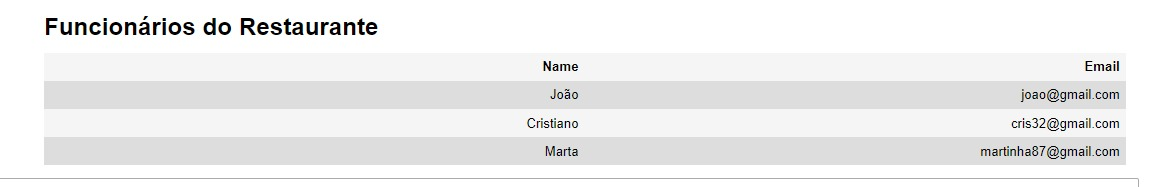

### Spellcheck/Grammar check.
Aqui estão alguns exemplos de problemas comuns de gramática e ortografia e a resposta do LLM.

Para sinalizar ao LLM que você deseja revisar seu texto, você instrui o modelo a 'revisar' ou 'revisar e corrigir'.

In [24]:
text = [ 
 "A menina o cachorrinho pretos e branco tem bola.", # The girl has a ball.
   "Yolanda está com o caderno dela.", # ok
   "Vai ser um longo dia. O carro precisa trocar o óleo?", # Homonyms
   "Deles vai minha liberdade. Lá vão trazer suas malas.", # Homonyms
   "Você vai precisar do seu notebook.", # Homonyms
   "Esse remédio afeta minha capacidade de dormir. Você já ouviu falar do efeito borboleta?", # Homonyms
   "Esta frase é para checar o chatGPT quanto à habilidade de ortografia" # spelling
]
for t in text:
    prompt = f"""Revise e corrija o seguinte texto
     e reescrever a versão corrigida.
     "Importante"Se você não encontrar nenhum erro, você deve dizer "Nenhum erro encontrado".
     não use qualquer pontuação ao redor do texto:
    ```{t}```"""
    response = get_completion(prompt)
    print(response)

A menina tem um cachorrinho preto e branco e uma bola.
Yolanda está com o caderno dela. Nenhum erro encontrado.
Vai ser um longo dia. O carro precisa trocar o óleo? 

Nenhum erro encontrado.
Deles vai a minha liberdade. Lá vão trazer suas malas.
Você vai precisar do seu notebook. Nenhum erro encontrado.
Esse remédio afeta minha capacidade de dormir. Você já ouviu falar do efeito borboleta? 

Nenhum erro encontrado.
Esta frase é para verificar a habilidade de ortografia do chatGPT.


In [25]:
text = f"""
Comprei isso para minha filha no aniversário dela porque ela continua tomando \
meu do meu quarto. Sim, os adultos também gostam de pandas. Ela pega \
em todos os lugares com ela, e é super macio e fofo. Um dos \
orelhas é um pouco mais baixa que a outra, e acho que não foi \
projetado para ser assimétrico. É um pouco pequeno para o que paguei \
no entanto. Acho que pode haver outras opções maiores para \
o mesmo preço. Chegou um dia antes do esperado, então recebi \
brincar com ele antes de dar para minha filha.
"""
prompt = f"revise e corrija esta crítica: ```{text}```"
response = get_completion(prompt)
print(response)

Comprei isso para o aniversário da minha filha, pois ela continua pegando o meu do meu quarto. Sim, os adultos também gostam de pandas. Ela o leva para todos os lugares, pois é super macio e fofo. No entanto, uma das orelhas é um pouco mais baixa que a outra, e acredito que não tenha sido projetado para ser assimétrico. Além disso, acho que é um pouco pequeno para o preço que paguei. Talvez haja outras opções maiores pelo mesmo valor. Porém, devo ressaltar que o produto chegou um dia antes do esperado, o que me permitiu brincar com ele antes de entregá-lo para minha filha.


#### Redlines install

In [ ]:
!pip install redlines

In [26]:
from redlines import Redlines

diff = Redlines(text,response)
display(Markdown(diff.output_markdown))

Comprei isso para <span style='color:green;font-weight:700;'>o aniversário da </span>minha <span style='color:red;font-weight:700;text-decoration:line-through;'>filha no aniversário dela porque </span><span style='color:green;font-weight:700;'>filha, pois </span>ela continua <span style='color:red;font-weight:700;text-decoration:line-through;'>tomando </span><span style='color:green;font-weight:700;'>pegando o </span>meu do meu quarto. Sim, os adultos também gostam de pandas. Ela <span style='color:red;font-weight:700;text-decoration:line-through;'>pega em </span><span style='color:green;font-weight:700;'>o leva para </span>todos os <span style='color:red;font-weight:700;text-decoration:line-through;'>lugares com ela, e </span><span style='color:green;font-weight:700;'>lugares, pois </span>é super macio e fofo. <span style='color:red;font-weight:700;text-decoration:line-through;'>Um dos </span><span style='color:green;font-weight:700;'>No entanto, uma das </span>orelhas é um pouco mais baixa que a outra, e <span style='color:red;font-weight:700;text-decoration:line-through;'>acho </span><span style='color:green;font-weight:700;'>acredito </span>que não <span style='color:red;font-weight:700;text-decoration:line-through;'>foi </span><span style='color:green;font-weight:700;'>tenha sido </span>projetado para ser assimétrico. <span style='color:red;font-weight:700;text-decoration:line-through;'>É </span><span style='color:green;font-weight:700;'>Além disso, acho que é </span>um pouco pequeno para o <span style='color:green;font-weight:700;'>preço </span>que <span style='color:red;font-weight:700;text-decoration:line-through;'>paguei no entanto. Acho que pode haver </span><span style='color:green;font-weight:700;'>paguei. Talvez haja </span>outras opções maiores <span style='color:red;font-weight:700;text-decoration:line-through;'>para </span><span style='color:green;font-weight:700;'>pelo mesmo valor. Porém, devo ressaltar que </span>o <span style='color:red;font-weight:700;text-decoration:line-through;'>mesmo preço. Chegou </span><span style='color:green;font-weight:700;'>produto chegou </span>um dia antes do esperado, <span style='color:red;font-weight:700;text-decoration:line-through;'>então recebi </span><span style='color:green;font-weight:700;'>o que me permitiu </span>brincar com ele antes de <span style='color:red;font-weight:700;text-decoration:line-through;'>dar </span><span style='color:green;font-weight:700;'>entregá-lo </span>para minha filha.

### Resultado:

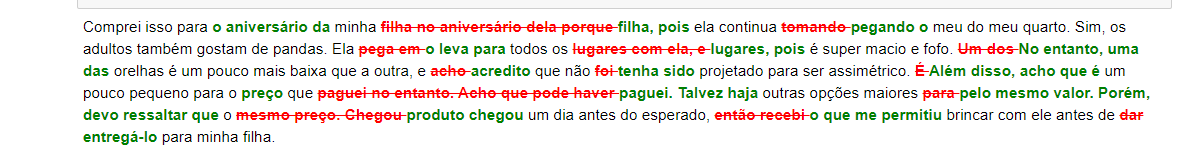

In [23]:
prompt = f"""
revise e corrija esta revisão. Torne-o mais atraente.
Certifique-se de que segue o guia de estilo da APA e visa um leitor avançado.
Saída em formato markdown.
Texto: ```{text}```
"""
response = get_completion(prompt)
display(Markdown(response))

Revisão:

O seguinte texto está em formato markdown e segue o guia de estilo da APA. É destinado a leitores avançados.

---

**Texto:**

- A menina o cachorrinho pretos e branco tem bola.
- Yolanda está com o caderno dela.
- Vai ser um longo dia. O carro precisa trocar o óleo?
- Deles vai minha liberdade. Lá vão trazer suas malas.
- Você vai precisar do seu notebook.
- Esse remédio afeta minha capacidade de dormir. Você já ouviu falar do efeito borboleta?
- Esta frase é para checar o chatGPT quanto à habilidade de ortografia.

---

**Revisão:**

- A menina tem um cachorrinho preto e branco com uma bola.
- Yolanda está com o seu caderno.
- Será um dia longo. O carro precisa trocar o óleo?
- A minha liberdade vai com eles. Eles vão trazer as suas malas.
- Você vai precisar do seu notebook.
- Esse remédio afeta a minha capacidade de dormir. Você já ouviu falar do efeito borboleta?
- Esta frase é para verificar a habilidade de ortografia do chatGPT.

### Resultado:

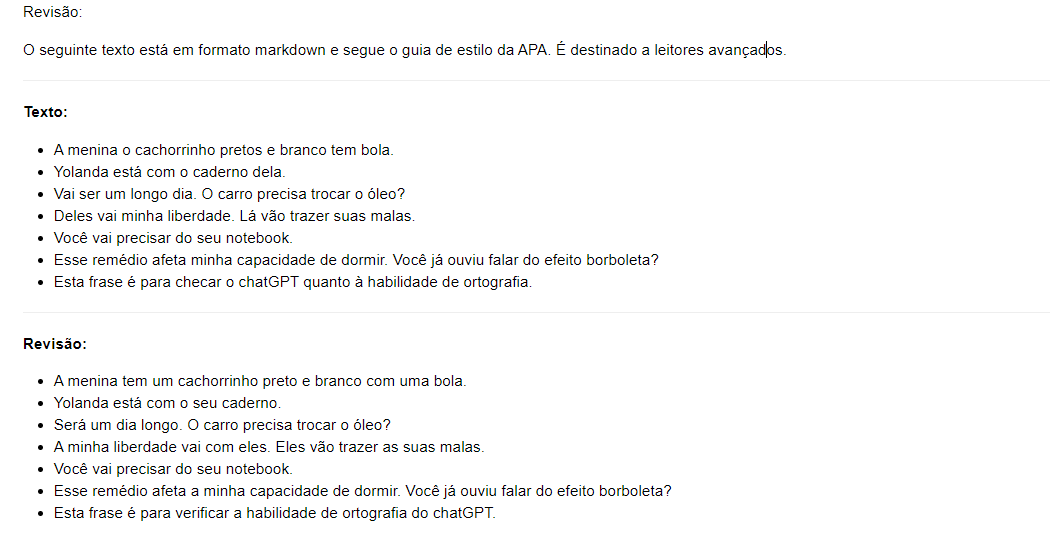